# Example two spins

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Non-commuting

We want to transition from the ground state of $\sigma_x$ to the  ground state of $\sigma_z$. The Hamiltonian of the system is defined as

$$H(t) = \bigg(1 -\frac{t}{\tau}\bigg)\sigma_x + \frac{t}{\tau}\sigma_z$$

for a total transition time $\tau$

In [2]:
#Set up Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_z = np.array([[1, 0],[0, -1]], dtype = complex)

In [3]:
#Hamiltonian
def Hamiltonian(t, tau):
    if t < tau:
        return (1-t/tau)*sigma_x + (t/tau)*sigma_z
    else:
        return sigma_z

In [6]:
#Initial state
H0 = sigma_x
vap,vep = np.linalg.eigh(H0)
psi0 = vep[:, 0]
print(vap)
print(vep)
print(psi0)

[-1.  1.]
[[-0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]
[-0.70710678+0.j  0.70710678+0.j]


In [4]:
#Slow evolution
tau = 60
iterations = 1000
evals = np.zeros([2,iterations])
ts = np.linspace(0, tau, iterations)
for i, t in enumerate(ts):
    H = Hamiltonian(t,tau)
    w = np.linalg.eigvalsh(H)
    
    evals[0][i] = w[0]
    evals[1][i] = w[1]

Text(0, 0.5, 'Energy gap')

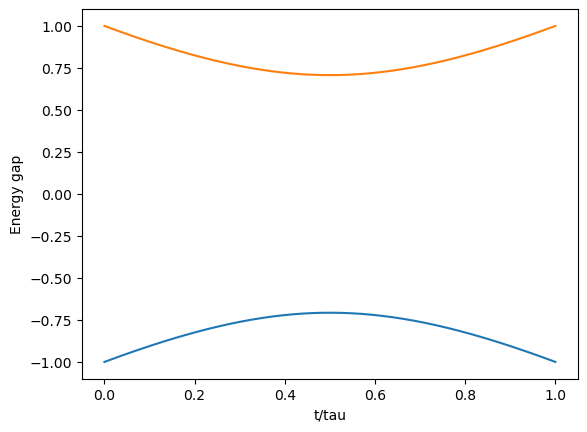

In [5]:
plt.plot(ts/tau,evals[0])
plt.plot(ts/tau,evals[1])
plt.xlabel("t/tau")
plt.ylabel("Energy gap")

In [12]:
gap1 = (abs(np.amin(evals[1])-np.amax(evals[0])))

In [8]:
#Fast evolution
tau = 0.01
iterations = 1000
evals = np.zeros([2,iterations])
ts = np.linspace(0, tau, iterations)
for i, t in enumerate(ts):
    H = Hamiltonian(t,tau)
    w = np.linalg.eigvalsh(H)
    
    evals[0][i] = w[0]
    evals[1][i] = w[1]

Text(0, 0.5, 'Energy gap')

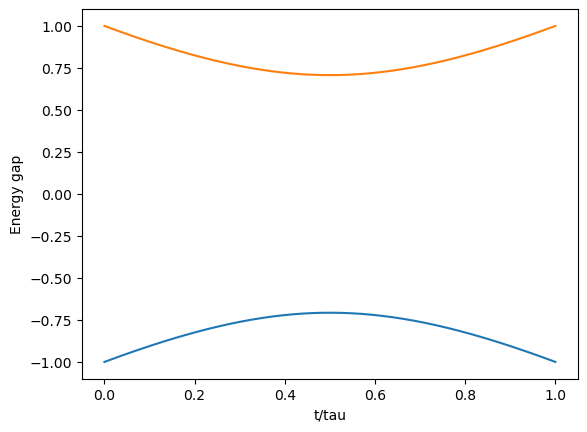

In [9]:
plt.plot(ts/tau,evals[0])
plt.plot(ts/tau,evals[1])
plt.xlabel("t/tau")
plt.ylabel("Energy gap")

In [11]:
gap2 = (abs(np.amin(evals[1])-np.amax(evals[0])))

In [13]:
print(gap1)
print(gap2)

1.4142142708960366
1.4142142708960366


We can see that in this case the energy levels do not cross even if the evolution is fast

Let's simulate the evolution and study the overlap with the instantaneous ground state for each case. We will use the Crank-Nicolson algorithm

$$ | \psi(t + \Delta t) \rangle = \bigg(1 + \frac{i \Delta t}{2 \hbar} H\bigg)^{-1} \bigg(1 - \frac{i \Delta t}{2 \hbar} H \bigg) | \psi(t) \rangle$$

In [14]:
#Crank-Nicolson
def CrankNicolson(H, psi, delta_t):
    
    M = np.identity(2, dtype=complex) - (0. + 1.j)*delta_t/2*H
    Minv = np.linalg.inv(np.identity(2, dtype=complex) + (0. + 1.j)*delta_t/2*H)
    
    psi = np.matmul(M, psi)
    psi = np.matmul(Minv, psi)
    
    return psi

In [15]:
#Evolution and overlap with instantaneous ground state and first excited state
def evolution(tau, ts, delta_t, func):
    
    overlap0 = []
    overlap1 = []

    for i, t in enumerate(ts):
        
        H = func(t,tau)
        
        if (t == 0):
            
            vap, vep = np.linalg.eigh(H)
            psi0 = vep[:, 0]
            psi0 = np.conjugate(psi0)
            psi1 = vep[:, 1]
            psi1 = np.conjugate(psi1)
            
            psi = psi0
    
            prod0 = np.dot(psi,psi0)
            mod0 = (np.real(prod0)*np.real(prod0) + np.imag(prod0)*np.imag(prod0))
            mod0 = mod0**(1/2)
            overlap0.append(mod0)
    
            prod1 = np.dot(psi,psi1)
            mod1 = (np.real(prod1)*np.real(prod1) + np.imag(prod1)*np.imag(prod1))
            mod1 = mod1**(1/2)
            overlap1.append(mod1)
            
            
        
        
        else:
            
            psi = CrankNicolson(H, psi, delta_t)
            
            vap, vep = np.linalg.eigh(H)
            psi0 = vep[:, 0]
            psi0 = np.conjugate(psi0)
            psi1 = vep[:, 1]
            psi1 = np.conjugate(psi1)
    
    
            prod0 = np.dot(psi,psi0)
            mod0 = (np.real(prod0)*np.real(prod0) + np.imag(prod0)*np.imag(prod0))
            mod0 = mod0**(1/2)
            overlap0.append(mod0)
    
            prod1 = np.dot(psi,psi1)
            mod1 = (np.real(prod1)*np.real(prod1) + np.imag(prod1)*np.imag(prod1))
            mod1 = mod1**(1/2)
            overlap1.append(mod1)
        
    return np.array(overlap0), np.array(overlap1)

In [16]:
#Slow evolution
tau = 60
iterations = 1000
ts = np.linspace(0, tau, iterations)
delta_t = tau/(iterations-1)
(overlap0, overlap1) = evolution(tau, ts, delta_t, Hamiltonian)

Text(0, 0.5, 'Overlap')

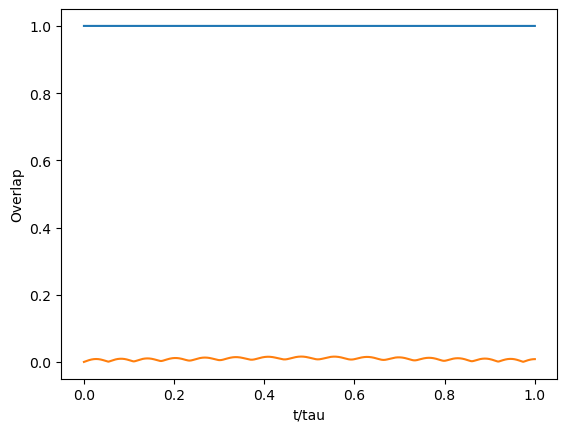

In [17]:
plt.plot(ts/tau,overlap0)
plt.plot(ts/tau,overlap1)
plt.xlabel("t/tau")
plt.ylabel("Overlap")

In [18]:
#Fast evolution
tau = 0.01
iterations = 1000
ts = np.linspace(0, tau, iterations)
delta_t = tau/(iterations-1)
(overlap0, overlap1) = evolution(tau, ts, delta_t, Hamiltonian)

Text(0, 0.5, 'Overlap')

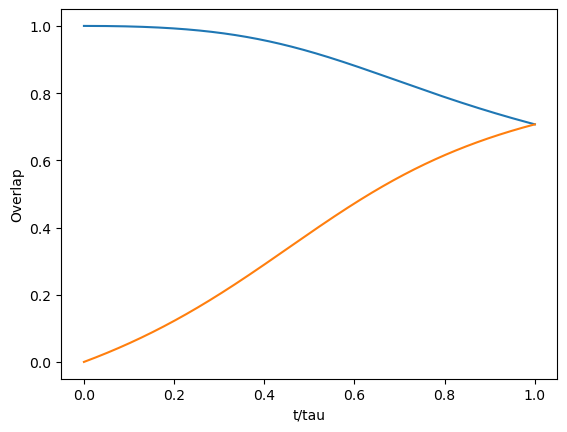

In [19]:
plt.plot(ts/tau,overlap0)
plt.plot(ts/tau,overlap1)
plt.xlabel("t/tau")
plt.ylabel("Overlap")

## Commuting

Let's study the Hamiltonian

$$H(t) = \bigg(1 -\frac{t}{\tau}\bigg)H_I + \frac{t}{\tau} H_P$$

for a total transition time $\tau$ with $H_I = Id - \sigma_z$ and $H_P = Id + \sigma_z$

In [20]:
#Hamiltonian
def Hamiltonian2(t, tau):
    if t < tau:
        return (1-t/tau)*(np.identity(2)-sigma_z) + (t/tau)*(np.identity(2)+sigma_z)
    else:
        return np.identity(2)+sigma_z

In [21]:
#Initial state
H0 = np.identity(2)-sigma_z
vap,vep = np.linalg.eigh(H0)
psi0 = vep[:, 0]
print(vap)
print(vep)
print(psi0)

[0. 2.]
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
[1.+0.j 0.+0.j]


In [22]:
#Slow evolution
tau = 60
iterations = 1000
evals = np.zeros([2,iterations])
ts = np.linspace(0, tau, iterations)
for i, t in enumerate(ts):
    H = Hamiltonian2(t,tau)
    w = np.linalg.eigvalsh(H)
    
    evals[0][i] = w[0]
    evals[1][i] = w[1]

Text(0, 0.5, 'Energy gap')

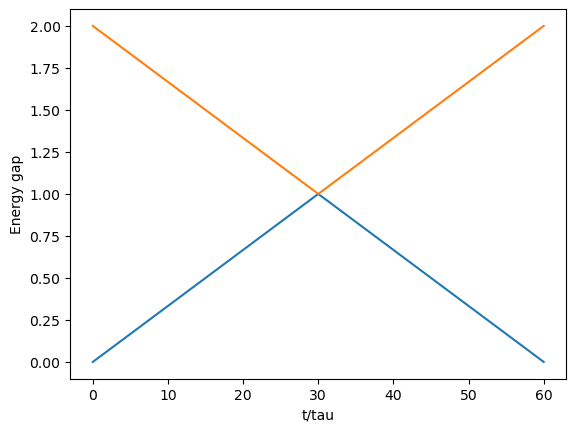

In [24]:
plt.plot(ts,evals[0])
plt.plot(ts,evals[1])
plt.xlabel("t/tau")
plt.ylabel("Energy gap")

In [25]:
#Fast evolution
tau = 0.01
iterations = 1000
evals = np.zeros([2,iterations])
ts = np.linspace(0, tau, iterations)
for i, t in enumerate(ts):
    H = Hamiltonian2(t,tau)
    w = np.linalg.eigvalsh(H)
    
    evals[0][i] = w[0]
    evals[1][i] = w[1]

Text(0, 0.5, 'Energy gap')

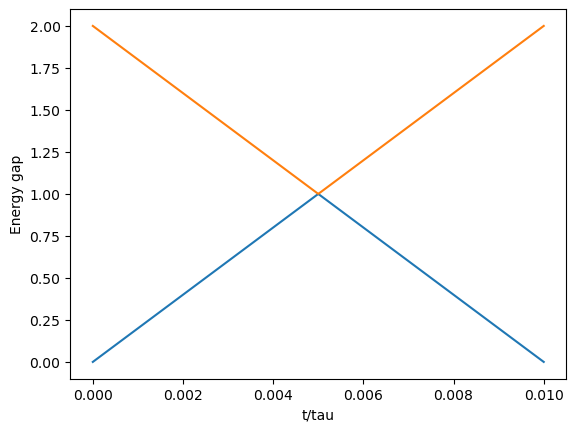

In [26]:
plt.plot(ts,evals[0])
plt.plot(ts,evals[1])
plt.xlabel("t/tau")
plt.ylabel("Energy gap")

In [27]:
#Slow evolution
tau = 60
iterations = 1000
ts = np.linspace(0, tau, iterations)
delta_t = tau/(iterations-1)
(overlap0, overlap1) = evolution(tau, ts, delta_t, Hamiltonian2)

Text(0, 0.5, 'Overlap')

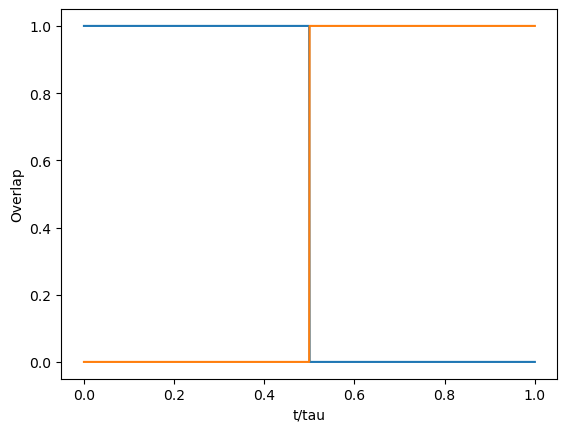

In [28]:
plt.plot(ts/tau,overlap0)
plt.plot(ts/tau,overlap1)
plt.xlabel("t/tau")
plt.ylabel("Overlap")

In [29]:
#Fast evolution
tau = 0.01
iterations = 1000
ts = np.linspace(0, tau, iterations)
delta_t = tau/(iterations-1)
(overlap0, overlap1) = evolution(tau, ts, delta_t, Hamiltonian2)

Text(0, 0.5, 'Overlap')

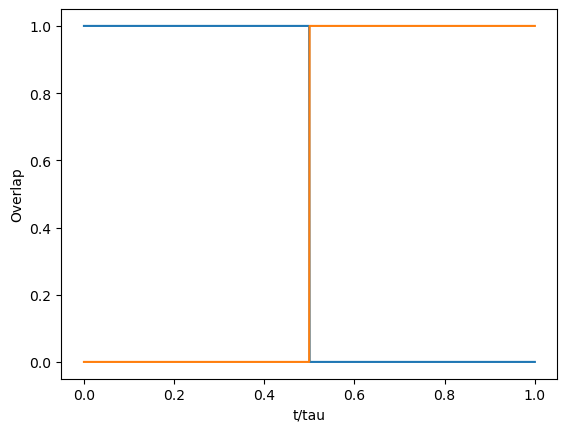

In [30]:
plt.plot(ts/tau,overlap0)
plt.plot(ts/tau,overlap1)
plt.xlabel("t/tau")
plt.ylabel("Overlap")